In [2]:
#DSE3002 - Project 3 - Patrick Norcross

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def AccConMax(y_test, y_pred):
    print(accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=['Low','Normal','High']).plot()

In [4]:
#1 - Importing data from 
data18 = pd.read_csv('ATUS18_3.csv')
data19 = pd.read_csv('ATUS19_3.csv')
data21 = pd.read_csv('ATUS21_3.csv')

In [5]:
#Data set up (all precrossing done in project 2 code)
X_18 = data18.iloc[:,:len(data18.columns)-1].values
y_18 = data18.iloc[:,len(data18.columns)-1:].values

y_18 = y_18.reshape(len(y_18),)

In [6]:
X_19 = data19.iloc[:,:len(data19.columns)-1].values
y_19 = data19.iloc[:,len(data19.columns)-1:].values

y_19 = y_19.reshape(len(y_19),)

In [7]:
X_21 = data21.iloc[:,:len(data21.columns)-1].values
y_21 = data21.iloc[:,len(data21.columns)-1:].values

y_21 = y_21.reshape(len(y_21),)

PART 1

Question 2

In [8]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from tabulate import tabulate

In [9]:
#Bagging

#Lower max features were not performing as well usually in the .50 range for the score.
#Below are some examples of parameters I tested.
scoreBag = 0
list = []
maxs = [.75,.25,.25,.5,.75] 
maxf = [.75,.75,1.,1.,1.]
for s, f in zip(maxs,maxf):
    for est in [50,100,200]:
        bagx = BaggingClassifier(n_estimators=est, max_samples= s, max_features= f, oob_score=True, random_state=1)
        bagx.fit(X_18, y_18)
        list.append([s,f,est, bagx.oob_score_])
        if bagx.oob_score_ > scoreBag:
            scoreBag = bagx.oob_score_
            bag = bagx
            
print(tabulate(list, headers=['sample prop','feature prop','estimators', 'scoreBag']))
print('\nBest Bagging Model:\n', bag)

  sample prop    feature prop    estimators    scoreBag
-------------  --------------  ------------  ----------
         0.75            0.75            50    0.613579
         0.75            0.75           100    0.616723
         0.75            0.75           200    0.625105
         0.25            0.75            50    0.609388
         0.25            0.75           100    0.617351
         0.25            0.75           200    0.613998
         0.25            1               50    0.627619
         0.25            1              100    0.637678
         0.25            1              200    0.638935
         0.5             1               50    0.633697
         0.5             1              100    0.647318
         0.5             1              200    0.650042
         0.75            1               50    0.633068
         0.75            1              100    0.639355
         0.75            1              200    0.639774

Best Bagging Model:
 BaggingClassifier(max_samp

In [10]:
#Random Forest
import warnings
warnings.filterwarnings('ignore')

scoreRF = 0
list = []
for maxf in ['auto', None]:
    for est in [10,50,100,200]:
        rfx = RandomForestClassifier(n_estimators= est, max_features= maxf, oob_score=True, random_state=1)
        rfx.fit(X_18, y_18)
        list.append([maxf,est, rfx.oob_score_])
        if rfx.oob_score_ > scoreRF:
            scoreRF = rfx.oob_score_
            rf = rfx
            
print(tabulate(list, headers=['max feat setting','num of feat', 'score']))
print('\nBest RF Model:\n', rf)

max feat setting      num of feat     score
------------------  -------------  --------
auto                           10  0.495599
auto                           50  0.595138
auto                          100  0.604359
auto                          200  0.615884
                               10  0.539816
                               50  0.629925
                              100  0.637888
                              200  0.640821

Best RF Model:
 RandomForestClassifier(max_features=None, n_estimators=200, oob_score=True,
                       random_state=1)


In [11]:
#AdaBoost
scoreBoost = 0
list = []
for est in [50,100,200]:
    for lr in [0.01,0.1,0.5,1,2]:
        boostx = AdaBoostClassifier(n_estimators=est, learning_rate=lr, random_state=1)
        boostx.fit(X_18, y_18)
        list.append([est, lr, boostx.score(X_18,y_18)])
        if boostx.score(X_18, y_18) > scoreBoost:
            scoreBoost = boostx.score(X_18, y_18)
            boost = boostx

print(tabulate(list, headers=['estimator','learning rate','score']))
print('\nBest Adaboost Model:\n', boost)

  estimator    learning rate     score
-----------  ---------------  --------
         50             0.01  0.503982
         50             0.1   0.549874
         50             0.5   0.606873
         50             1     0.651718
         50             2     0.333822
        100             0.01  0.503982
        100             0.1   0.567687
        100             0.5   0.644174
        100             1     0.682733
        100             2     0.333822
        200             0.01  0.503982
        200             0.1   0.593043
        200             0.5   0.667854
        200             1     0.723177
        200             2     0.333822

Best Adaboost Model:
 AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)


Question 3

In [12]:
print('RF:     ',scoreRF)
print('Bagging:',scoreBag)
print('Boost:  ',scoreBoost)

#Based on the out-of-bag score/score, I would expect the Boosting classifer to predict the best since it is higher than bost bagging and boosting.
#This may be becuause it is using a different scoring method.

RF:      0.6408214585079631
Bagging: 0.6500419111483655
Boost:   0.7231768650461022


Question 4

Random Forest
0.6322705730288669
Bagging
0.6389487289961223
ADA Boosting
0.6650150797070228


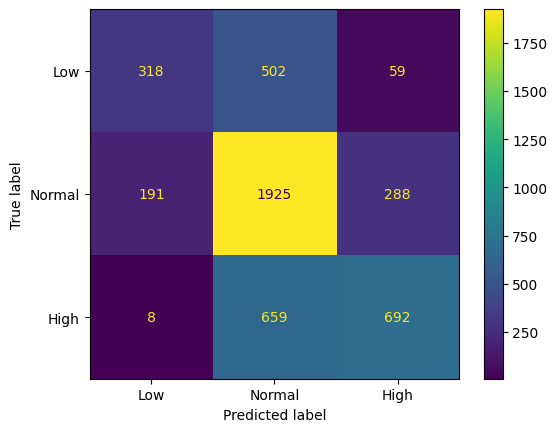

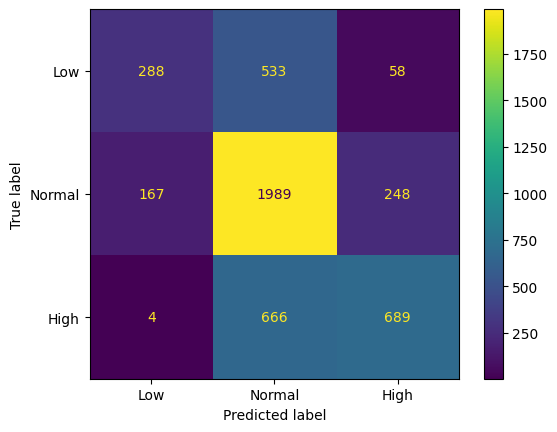

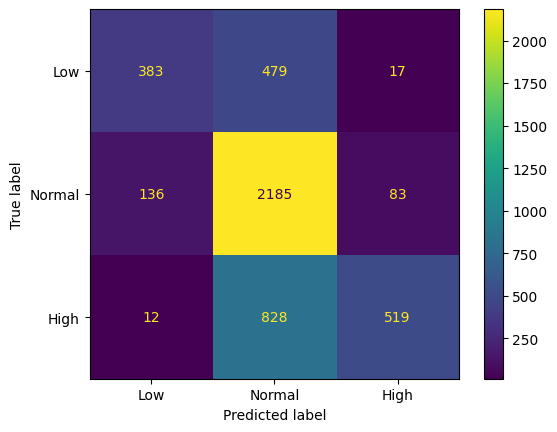

In [13]:
#2019 CONFUSION MATRICES

y_19_pred_bag = bag.predict(X_19)
y_19_pred_rf = rf.predict(X_19)
y_19_pred_ada = boost.predict(X_19)

print('Random Forest')
AccConMax(y_19, y_19_pred_rf)
print('Bagging')
AccConMax(y_19, y_19_pred_bag)
print('ADA Boosting')
AccConMax(y_19, y_19_pred_ada)

In [ ]:
#The ADABoost did the best for 2019, which did match my hypothesis from step 3.
#ADABoost was biased toward Normal Sleep whereas the other 2 were focused more toward higher sleep levels.

Random Forest
0.640464199693453
Bagging
0.6533829647470988
ADA Boosting
0.6822859645281366


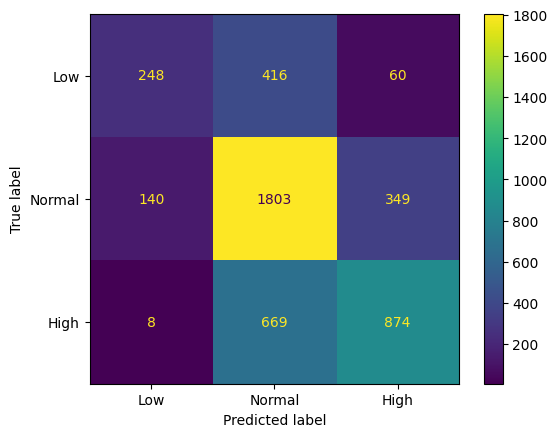

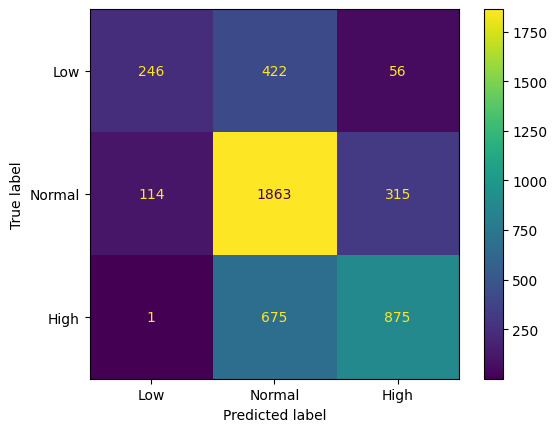

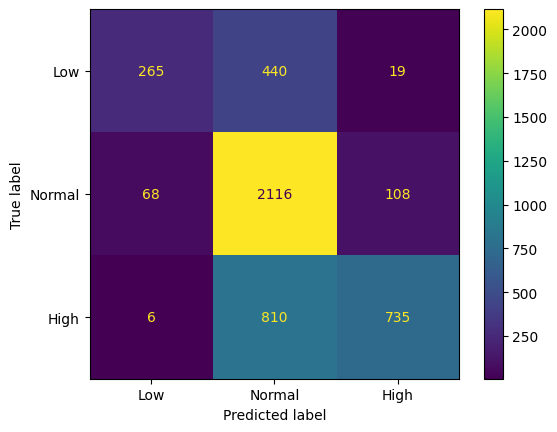

In [14]:
#2021 CONFUSION MATRICES

y_21_pred_bag = bag.predict(X_21)
y_21_pred_rf = rf.predict(X_21)
y_21_pred_ada = boost.predict(X_21)

print('Random Forest')
AccConMax(y_21, y_21_pred_rf)
print('Bagging')
AccConMax(y_21, y_21_pred_bag)
print('ADA Boosting')
AccConMax(y_21, y_21_pred_ada)

In [ ]:
#The same things held in the 2021 data as the 2019 data.
#The ADABoost did the best for 2021, which did match my hypothesis from step 3.
#ADABoost was biased toward Normal Sleep whereas the other 2 were focused more toward higher sleep levels.

PART 2

Question 5

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
tuple(range(1,11))

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [16]:
#Decision Tree GridSearch
parameters = {'max_depth': (1,2,3,4,5,6,7,8,9,10)}
GS = GridSearchCV(DecisionTreeClassifier(), parameters)
GS.fit(X_18, y_18)
dt = GS.best_estimator_
print(dt)
print(dt.score(X_18, y_18))

#kNN GridSearch
parameters = {'n_neighbors': (9, 13, 17, 19, 21, 23, 25, 27)} #not always the best result
GS = GridSearchCV(KNeighborsClassifier(), parameters)
GS.fit(X_18, y_18)
knn = GS.best_estimator_
print(knn)
print(knn.score(X_18, y_18))

#SVC GridSearch
parameters = {'kernel': ('linear', 'rbf'), 'C': [10]} #I checked 1-10 but to save on run time I set it to 10
svc = SVC(probability=True)
GS = GridSearchCV(svc, parameters)
GS.fit(X_18, y_18)
svm = GS.best_estimator_
print(svm)
print(svm.score(X_18, y_18))

#Naive Bayes (No GridSearch)
nb = GaussianNB()
nb.fit(X_18, y_18)
print(nb)
print(nb.score(X_18, y_18))

#SVM is the highest score at .87 while naivebayes is the lowest with .51


DecisionTreeClassifier(max_depth=8)
0.6823134953897737
KNeighborsClassifier(n_neighbors=21)
0.5752305113160101
SVC(C=10, kernel='linear', probability=True)
0.875314333612741
GaussianNB()
0.5132020117351216


In [17]:
Vclf = VotingClassifier(estimators=[('dt',dt),('knn',knn),('svm',svm), ('nb',nb)],
                        voting='soft', weights=[1,1,1,1])

Vclf.fit(X_18, y_18)
Vclf.score(X_18, y_18)

0.7518860016764459

In [19]:
Vclfw = VotingClassifier(estimators=[('dt',dt),('knn',knn),('svm',svm),('nb', nb)],
                        voting='soft',weights=[3,1,6,0.5])

Vclfw.fit(X_18, y_18)
Vclfw.score(X_18, y_18)
#This score is unsurpisingly higher than the one with equal weights since I prioritized the better performing models.

0.8883067896060352

0.6949590693666523


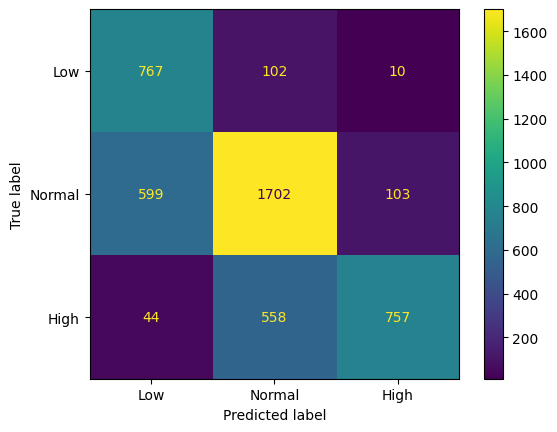

In [20]:
#2019 CONFUSION MATRIX
y_19_pred_vote = Vclfw.predict(X_19)
AccConMax(y_19, y_19_pred_vote)

0.7074666082767681


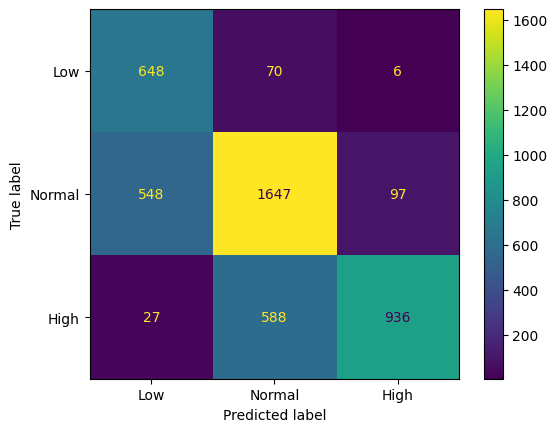

In [21]:
#2021 CONFUSION MATRIX
y_21_pred_vote = Vclfw.predict(X_21)
AccConMax(y_21, y_21_pred_vote)

In [ ]:
#Best 2019 - Voting Classifier
#The voting classifier does lower the accuracy of normal sleep but puts more priority into both low and high sleep making it better for overall accuracy.

In [ ]:
#Best 2021 - Voting Classifier
#The voting classifier again lowers the accuracy of normal sleep but allows low sleep and high sleep to have higher accuracy as well.